In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/bike_buyers.csv')

In [3]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [4]:
df.dtypes

ID                    int64
Marital Status       object
Gender               object
Income              float64
Children            float64
Education            object
Occupation           object
Home Owner           object
Cars                float64
Commute Distance     object
Region               object
Age                 float64
Purchased Bike       object
dtype: object

In [5]:
df.shape

(1000, 13)

In [6]:
len(df.ID.unique())

1000

In [7]:
df_index = df[['ID']]
df = df.drop(['ID'], axis = 1)

<AxesSubplot:>

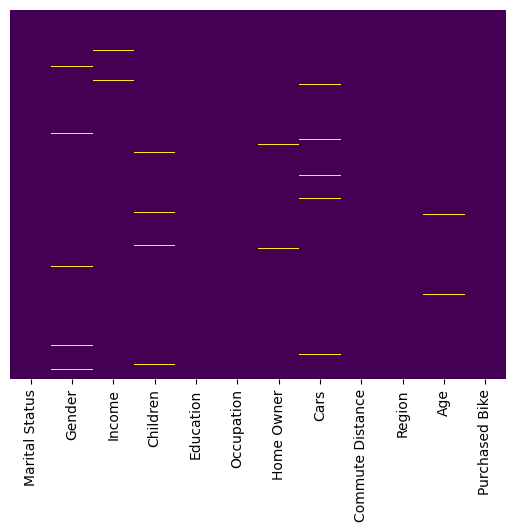

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df.isna().sum().sort_values()

Education            0
Occupation           0
Commute Distance     0
Region               0
Purchased Bike       0
Home Owner           4
Income               6
Marital Status       7
Children             8
Age                  8
Cars                 9
Gender              11
dtype: int64

### Limpieza de datos

In [10]:
#El ingreso promedio por ocupacion
df.groupby('Occupation')[['Income']].mean()

,Income
Occupation,
Clerical,31022.727273
Management,86647.398844
Manual,15086.206897
Professional,75054.545455
Skilled Manual,51535.433071


In [11]:
def impute_income(cols):
    Income = cols[0]
    Occupation = cols[1]
    
    if pd.isnull(Income):

        if Occupation == 'Clerical':
            return 31022.0

        elif Occupation == 'Management':
            return 86647.0

        elif Occupation == 'Manual':
            return 15086.0
        
        elif Occupation == 'Professional':
            return 75054.0

        else:
            return 51535.0

    else:
        return Income

In [12]:
df['Income'] = df[['Income','Occupation']].apply(impute_income,axis=1)

In [13]:
#El promedio de numero de hijos por estado civil
df.groupby('Marital Status')[['Children']].mean()

,Children
Marital Status,
Married,2.114232
Single,1.691796


In [14]:
def impute_children(cols):
    Children = cols[0]
    Status = cols[1]
    
    if pd.isnull(Children):

        if Status == 'Married':
            return 2.0

        else:
            return 1.0

    else:
        return Children

In [15]:
df['Children'] = df[['Children','Marital Status']].apply(impute_children,axis=1)

In [16]:
#El promedio de carros por ocupacion
df.groupby('Occupation')[['Cars']].mean()

,Cars
Occupation,
Clerical,0.833333
Management,2.162791
Manual,1.042373
Professional,1.712727
Skilled Manual,1.313492


In [17]:
def impute_cars(cols):
    Cars = cols[0]
    Occupation = cols[1]
    
    if pd.isnull(Cars):

        if Occupation == 'Clerical':
            return 1.0

        elif Occupation == 'Management':
            return 2.0

        elif Occupation == 'Manual':
            return 1.0
        
        elif Occupation == 'Professional':
            return 2.0

        else:
            return 1.0

    else:
        return Cars

In [18]:
df['Cars'] = df[['Cars','Occupation']].apply(impute_cars,axis=1)

In [19]:
#La edad promedio por educacion
df.groupby('Education')[['Age']].mean()

,Age
Education,
Bachelors,45.314754
Graduate Degree,44.835294
High School,44.089888
Partial College,43.125475
Partial High School,42.039474


In [20]:
def impute_age(cols):
    Age = cols[0]
    Education = cols[1]
    
    if pd.isnull(Age):

        if Education == 'Bachelors':
            return 45.0

        elif Education == 'Graduate Degree':
            return 45.0

        elif Education == 'High School':
            return 44.0
        
        elif Education == 'Partial College':
            return 43.0

        else:
            return 42.0

    else:
        return Age

In [21]:
df['Age'] = df[['Age','Education']].apply(impute_age,axis=1)

<AxesSubplot:>

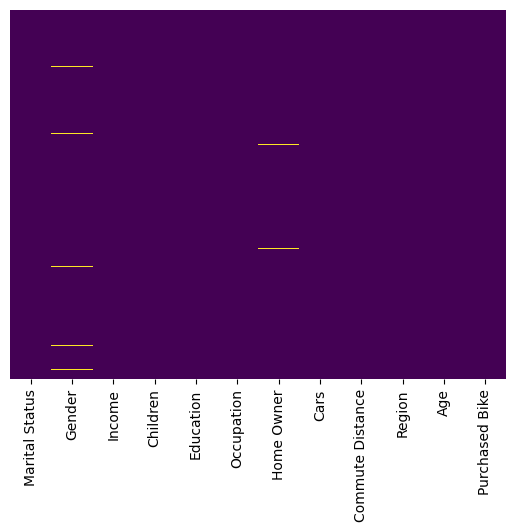

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Calcular la correlación entre las variables numéricas de los clientes que compran bicicletas.

In [23]:
numerics= df.select_dtypes(include=['float64', 'int'])
dfc = numerics.assign(Purchased = df[['Purchased Bike']])
dfc = dfc[dfc.Purchased == 'Yes']

In [24]:
dfc.head()

,Income,Children,Cars,Age,Purchased
3,70000.0,0.0,1.0,41.0,Yes
4,30000.0,0.0,0.0,36.0,Yes
6,160000.0,2.0,4.0,33.0,Yes
7,40000.0,1.0,0.0,43.0,Yes
9,15086.0,2.0,1.0,43.0,Yes


C:\Users\USER\AppData\Local\Temp\ipykernel_4920\3390500073.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfc.corr())


<AxesSubplot:>

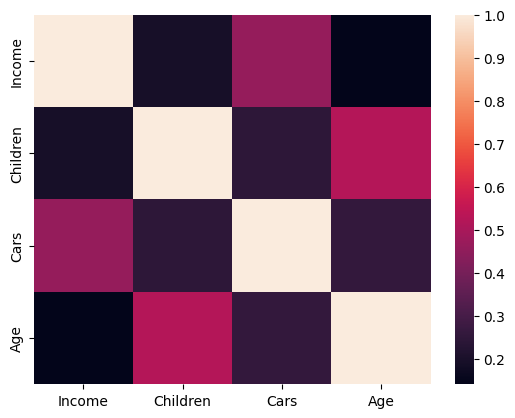

In [25]:
sns.heatmap(dfc.corr())

### ¿Qué regiones presentan el mayor número de compra “Yes” y “No”?

<AxesSubplot:xlabel='Region', ylabel='count'>

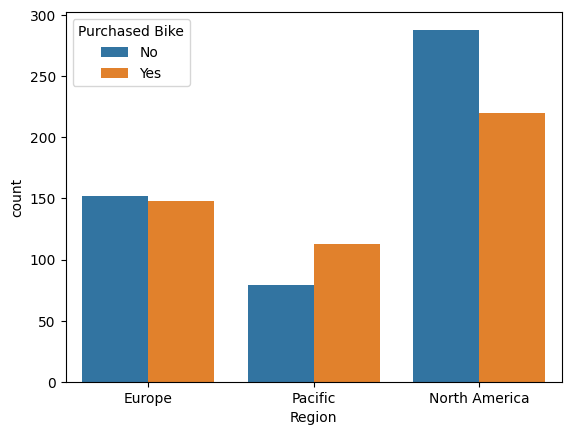

In [26]:
sns.countplot(x='Region', hue='Purchased Bike',data=df,)

### Analizar las variables Gender, Occupation y Children.

[Text(0.5, 1.0, 'Numero de personas de cada genero por ocupacion')]

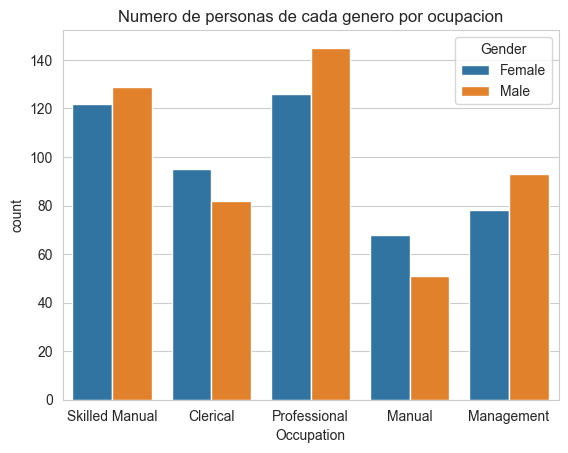

In [63]:
sns.countplot(x='Occupation',hue='Gender',data=df).set(title='Numero de personas de cada genero por ocupacion')

[Text(0.5, 1.0, 'Numero de hijos por genero')]

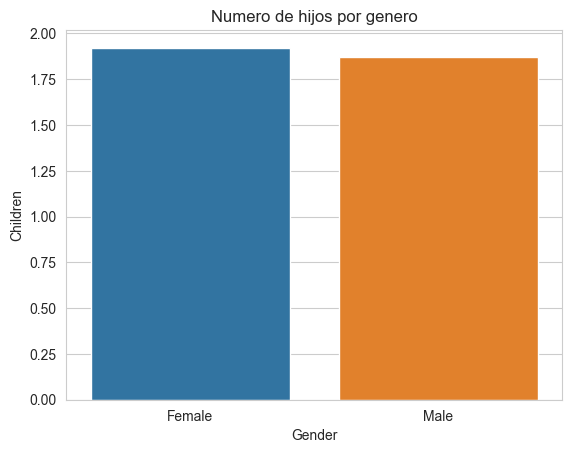

In [56]:
sns.barplot(x='Gender',y='Children',data=df, errorbar=('ci', 0)).set(title='Numero de hijos por genero')

[Text(0.5, 1.0, 'Numero de hijos por genero')]

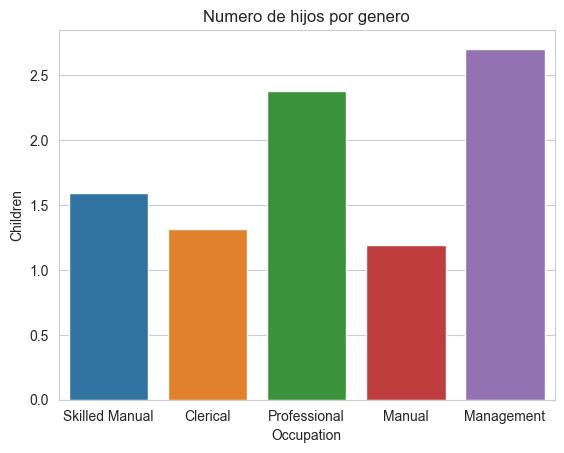

In [55]:
sns.barplot(x='Occupation',y='Children',data=df, errorbar=('ci', 0)).set(title='Numero de hijos por ocupacion')